In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("steam_reviews.csv")
df.head()


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [6]:
pd.set_option('display.max_columns', None)

df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,0.0,0,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,0.0,0,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,0.0,0,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.0,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,0,0.0,0,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


# Drop Unnecessary Column
The `Unnamed: 0` column is removed from the DataFrame as it serves no purpose in the analysis. This column is likely an index column generated during data loading and duplicates the row index, so we drop it to clean up the dataset.


In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

# Check DataFrame Dimensions
Using `df.shape` to display the dimensions of the DataFrame. This shows the number of rows and columns in the dataset, giving an initial understanding of its size.


In [8]:
df.shape

(21747371, 22)

# Check for Missing Values
Using `df.isnull().sum()` to identify columns with missing values and the total count per column. Although some columns, like `review` and `author.playtime_at_review`, contain null values, they won’t impact the analysis, so we won’t be dropping or filling these missing values.


In [9]:
df.isnull().sum()

app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33742
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

# DataFrame Overview
Using `df.info()` to get a concise summary of the DataFrame, including the number of non-null entries in each column and their data types. This provides a quick overview of the dataset’s structure and helps assess data completeness.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   app_id                          int64  
 1   app_name                        object 
 2   review_id                       int64  
 3   language                        object 
 4   review                          object 
 5   timestamp_created               int64  
 6   timestamp_updated               int64  
 7   recommended                     bool   
 8   votes_helpful                   int64  
 9   votes_funny                     int64  
 10  weighted_vote_score             float64
 11  comment_count                   int64  
 12  steam_purchase                  bool   
 13  received_for_free               bool   
 14  written_during_early_access     bool   
 15  author.steamid                  int64  
 16  author.num_games_owned          int64  
 17  author.num_reviews       

# Statistical Summary of Numerical Columns
Using `df.describe()` to generate summary statistics for all numerical columns in the DataFrame, such as mean, standard deviation, minimum, and maximum values. This provides insight into the distribution and range of values in these columns.


In [11]:
df.describe()

,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07,2.174737e+07
mean,3.928181e+05,5.187500e+07,1.544432e+09,1.547556e+09,4.044689e+05,1.267917e+05,1.654424e-01,1.308768e-01,7.656120e+16,1.011300e+06,4.044775e+05,1.609105e+04,1.555421e+02,8.807421e+03,1.580505e+09
std,2.480977e+05,2.084267e+07,5.812194e+07,5.689899e+07,1.333741e+09,2.333553e+07,2.434006e-01,2.199398e+00,3.179438e+08,2.108829e+09,1.333741e+09,3.743057e+04,7.300488e+02,2.388553e+04,4.676178e+07
min,7.000000e+01,4.300000e+01,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.427600e+05,3.639355e+07,1.510223e+09,1.511729e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02,1.573329e+09
50%,3.595500e+05,5.384058e+07,1.562446e+09,1.572189e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03,1.599058e+09
75%,5.780800e+05,6.928793e+07,1.589696e+09,1.591403e+09,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03,1.609002e+09
max,1.291340e+06,8.521867e+07,1.611426e+09,2.283383e+09,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,1.611434e+09


# Distribution of Recommendations
Using a count plot to visualize the distribution of the `recommended` column, which shows the number of positive and negative recommendations. This provides insight into the overall sentiment of the reviews, with a significantly higher count of positive recommendations.


/var/folders/2n/w4ltzfmx2tx7rpcv2z1fm1gm0000gn/T/ipykernel_73830/885628260.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(['{:,}'.format(int(y)) for y in plot.get_yticks()])


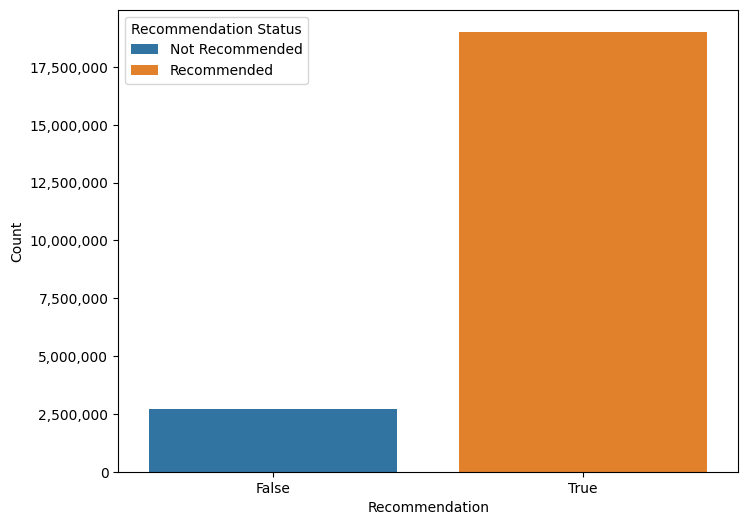

In [14]:
plt.figure(figsize=(8, 6))
plot = sns.countplot(x='recommended', data=df)
plot.set_yticklabels(['{:,}'.format(int(y)) for y in plot.get_yticks()])
plot.set_xlabel("Recommendation")
plot.set_ylabel("Count")

labels = ['Not Recommended', 'Recommended']
for bar, label in zip(plot.patches, labels):
    bar.set_label(label)
plot.legend(title="Recommendation Status")

plt.show()


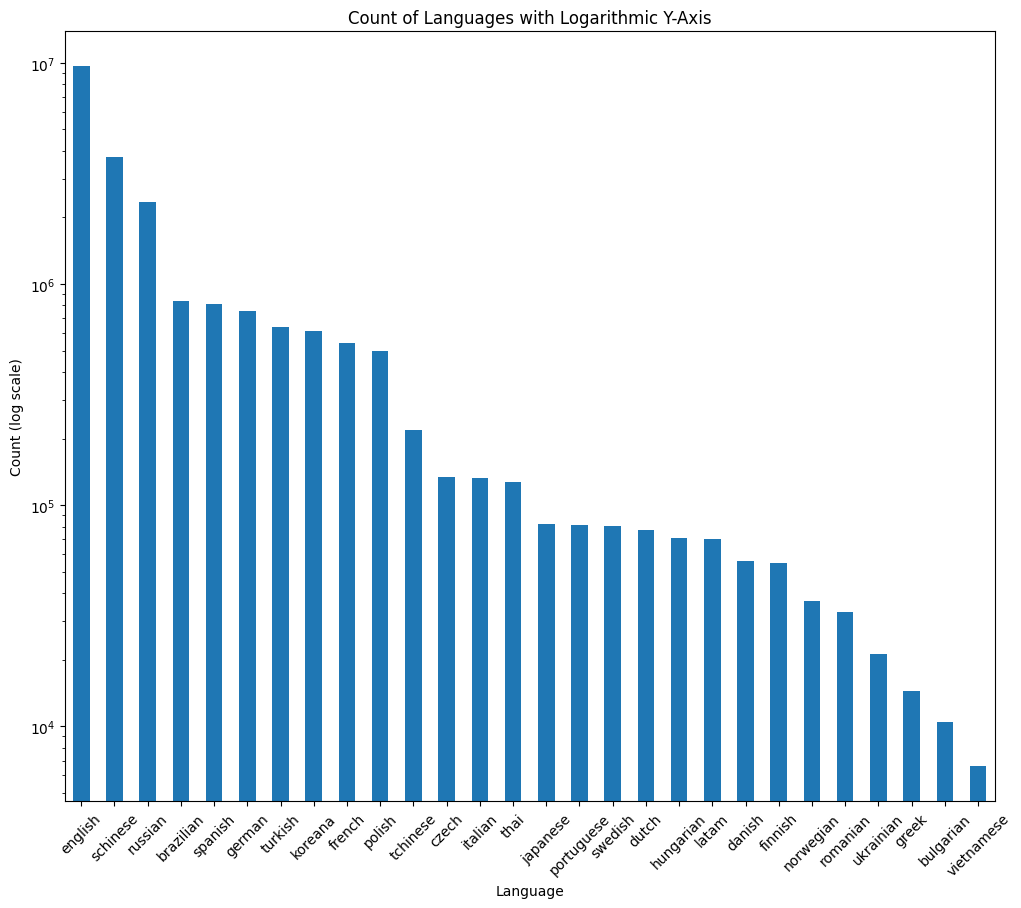

In [26]:
language_counts = df['language'].value_counts()

plt.figure(figsize=(12, 10))
language_counts.plot(kind='bar')
plt.yscale('log')

plt.title('Count of Languages with Logarithmic Y-Axis')
plt.xlabel('Language')
plt.ylabel('Count (log scale)')
plt.xticks(rotation=45)
plt.show()

Since the top three languages are English, Simplified Chinese, and Russian, let’s identify the top 10 games with reviews in each of these languages.

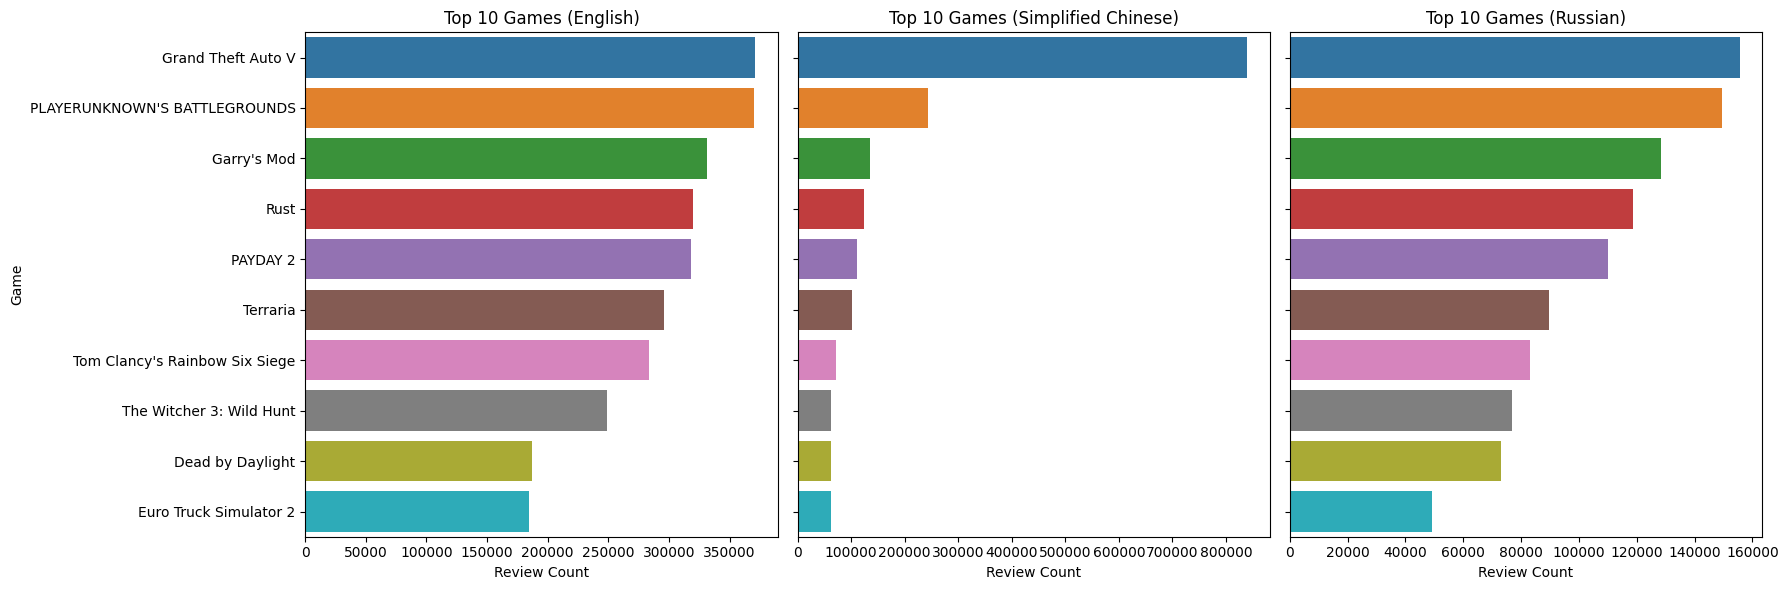

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

languages = ['english', 'schinese', 'russian']
titles = ['Top 10 Games (English)', 'Top 10 Games (Simplified Chinese)', 'Top 10 Games (Russian)']

for i, language in enumerate(languages):
    language_df = df[df['language'] == language]
    
    top_games = language_df['app_name'].value_counts().head(10)
    
    sns.barplot(x=top_games.values, y=top_games.index, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Review Count')
    if i == 0:
        axes[i].set_ylabel('Game')

plt.tight_layout()
plt.show()

# Top 20 Games Recommendation Distribution
This section visualizes the recommendation distribution for the top 20 most-reviewed games. Each subplot represents a game, with bars showing the count of reviews that are either recommended (True) or not recommended (False). 

By examining these plots, we can observe the proportion of positive and negative reviews for each game, giving insight into the general sentiment and popularity of these top games. This layout helps compare recommendations across popular titles in a clear, side-by-side format.


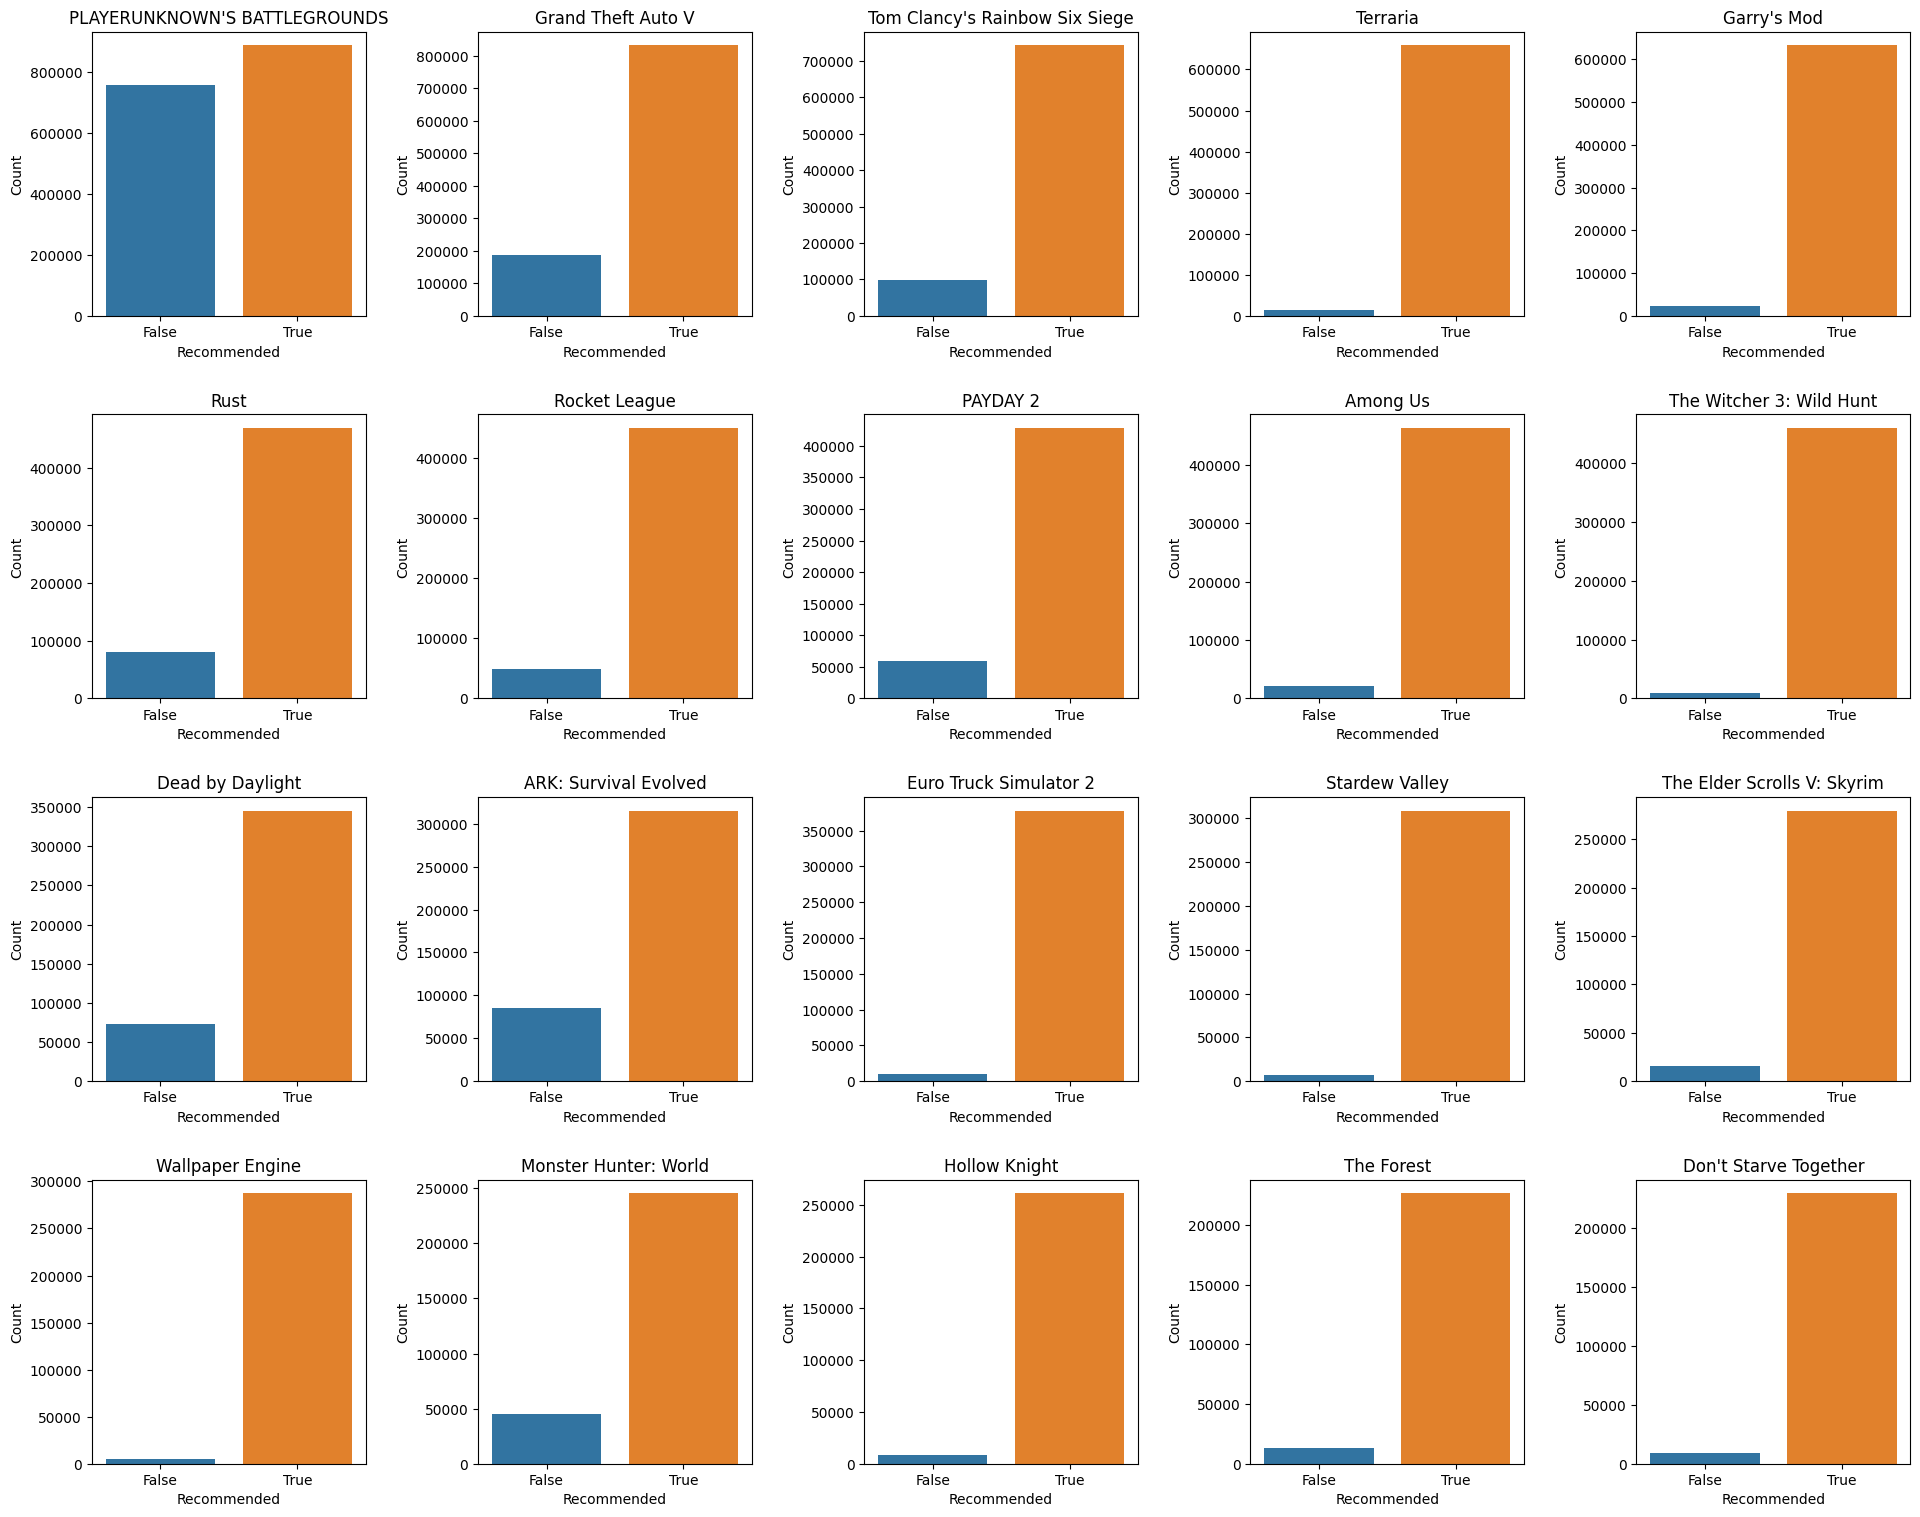

In [18]:
top_20_games = df['app_name'].value_counts().head(20).index

recommendations_per_game = df.groupby(['app_name', 'recommended']).size().reset_index(name='count')

fig, axes = plt.subplots(4, 5, figsize=(20, 16))  
fig.tight_layout(pad=5.0)  

for i, game in enumerate(top_20_games):
    
    game_data = recommendations_per_game[recommendations_per_game['app_name'] == game]
    
   
    ax = axes[i // 5, i % 5] 
    
    sns.barplot(x='recommended', y='count', data=game_data, ax=ax)
    
    ax.set_title(f"{game}")
    ax.set_xlabel("Recommended")
    ax.set_ylabel("Count")

plt.show()


# Language Distribution with Logarithmic Scale
This bar chart displays the count of different languages in the dataset, with the y-axis on a logarithmic scale. By using a log scale, we can more effectively visualize the wide range of language counts, highlighting both the most common languages (e.g., English and Chinese) and the less frequent ones. This approach makes it easier to see variations across languages that would otherwise be difficult to observe on a linear scale.


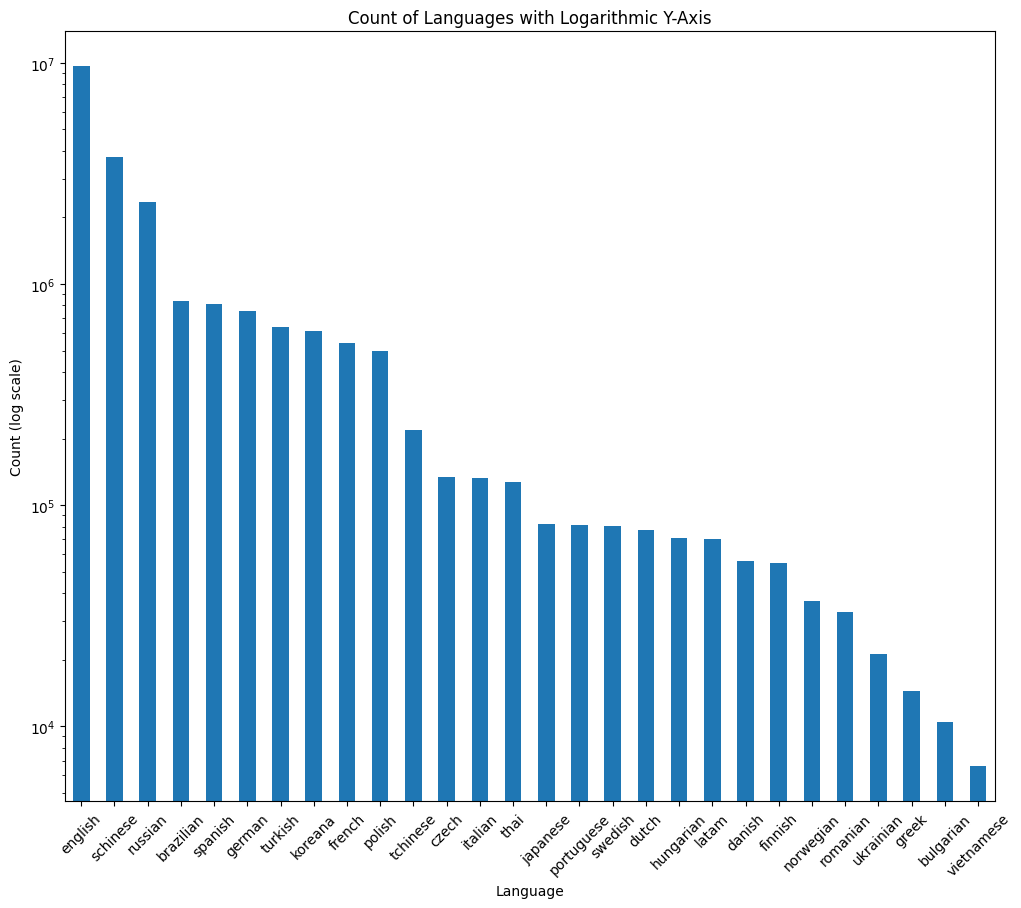

In [19]:
language_counts = df['language'].value_counts()

plt.figure(figsize=(12, 10))
language_counts.plot(kind='bar')
plt.yscale('log')

plt.title('Count of Languages with Logarithmic Y-Axis')
plt.xlabel('Language')
plt.ylabel('Count (log scale)')
plt.xticks(rotation=45)
plt.show()

# Calculate Proportions for Recommendations in Early Access vs. Not Early Access
This section prepares data for visualizing the proportions of positive and negative recommendations within Early Access and Not Early Access games. These proportions will be used in the bar charts to compare recommendation rates across different release stages.

1. **Filter Positive and Negative Reviews**:
   - `df_rcm_f`: Filters reviews marked as `False` (not recommended).
   - `df_rcm_t`: Filters reviews marked as `True` (recommended).

2. **Total Counts of Positive and Negative Reviews**:
   - `total_bad_rcm`: Total number of negative reviews.
   - `total_good_rcm`: Total number of positive reviews.

3. **Counts by Access Type**:
   - **For Negative (Not Recommended) Reviews**:
     - `total_bad_rcm_early_access`: Counts negative reviews for Early Access games.
     - `total_bad_rcm_not_early_access`: Counts negative reviews for Not Early Access games.
   - **For Positive (Recommended) Reviews**:
     - `total_good_rcm_early_access`: Counts positive reviews for Early Access games.
     - `total_good_rcm_not_early_access`: Counts positive reviews for Not Early Access games.

4. **Calculate Proportions for Each Category**:
   - **Early Access Proportions**:
     - `proportion_bad_early_access`: Proportion of negative reviews in Early Access.
     - `proportion_good_early_access`: Proportion of positive reviews in Early Access.
   - **Not Early Access Proportions**:
     - `proportion_bad_not_early_access`: Proportion of negative reviews in Not Early Access.
     - `proportion_good_not_early_access`: Proportion of positive reviews in Not Early Access.

These calculated proportions (`early_access_proportions` and `not_early_access_proportions`) are then used to create side-by-side bar charts, showing the distribution of positive and negative reviews for Early Access and Not Early Access games.


In [15]:
df_rcm_f = df[df['recommended']==False]
df_rcm_t = df[df['recommended']==True]


In [17]:
total_bad_rcm = len(df_rcm_f)

total_bad_rcm_early_access = len(df_rcm_f[df_rcm_f['written_during_early_access'] == True])
total_bad_rcm_not_early_access = len(df_rcm_f[df_rcm_f['written_during_early_access'] == False])



proportion_bad_early_access = (total_bad_rcm_early_access / total_bad_rcm) * 100

proportion_bad_early_access

13.085257752881812

In [18]:
proportion_bad_not_early_access = (total_bad_rcm_not_early_access/ total_bad_rcm)* 100
proportion_bad_not_early_access

86.9147422471182

In [19]:
total_good_rcm = len(df_rcm_t)

total_good_rcm_early_access = len(df_rcm_t[df_rcm_t['written_during_early_access'] == True])
total_good_rcm_not_early_access = len(df_rcm_t[df_rcm_t['written_during_early_access'] == False])



proportion_good_early_access = (total_good_rcm_early_access / total_good_rcm) * 100

proportion_good_early_access


8.725632287052091

In [20]:
proportion_good_not_early_access = (total_good_rcm_not_early_access / total_good_rcm) * 100
proportion_good_not_early_access

91.2743677129479

# Comparison of Recommendations in Early Access vs. Not Early Access
These bar charts compare the proportion of positive (recommended) and negative (not recommended) reviews for Early Access and Not Early Access games separately. 

- **Early Access**: Shows a lower proportion of both positive and negative recommendations, reflecting the potentially limited stability and feature set of early-stage games.
- **Not Early Access**: Exhibits a higher overall recommendation rate, indicating that games with a full release status generally receive more stable feedback.

This visualization highlights how user recommendations differ based on the release status, offering insight into user sentiment and expectations for Early Access vs. fully released games.


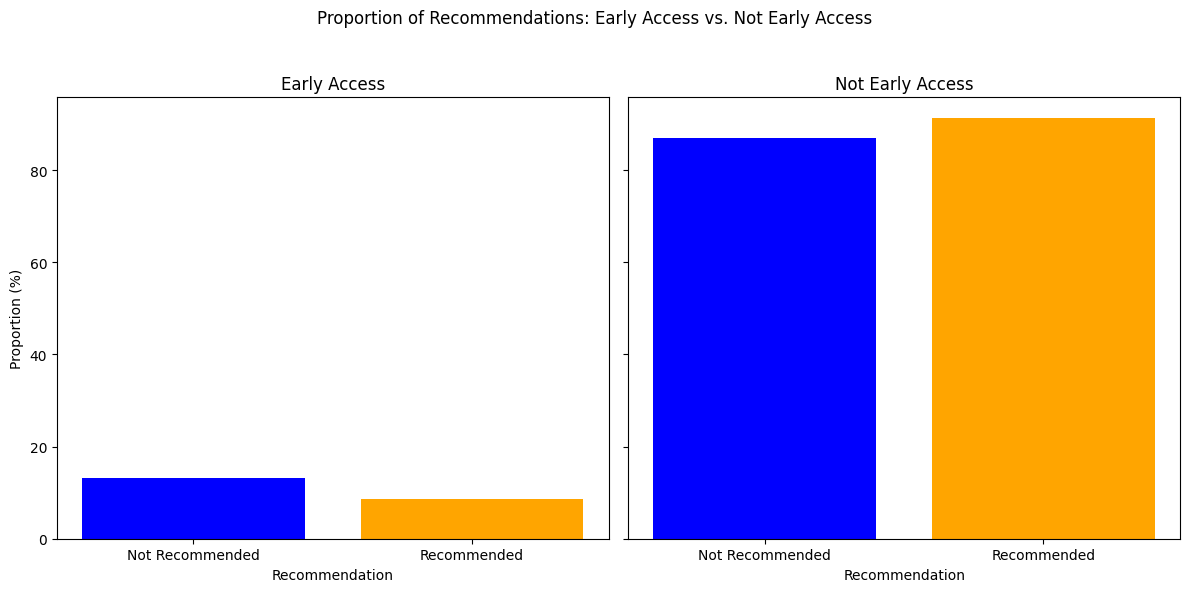

In [25]:
labels = ['Not Recommended', 'Recommended']
early_access_proportions = [proportion_bad_early_access, proportion_good_early_access]
not_early_access_proportions = [proportion_bad_not_early_access, proportion_good_not_early_access]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axes[0].bar(labels, early_access_proportions, color=['blue', 'orange'])
axes[0].set_title('Early Access')
axes[0].set_ylabel('Proportion (%)')
axes[0].set_xlabel('Recommendation')

axes[1].bar(labels, not_early_access_proportions, color=['blue', 'orange'])
axes[1].set_title('Not Early Access')
axes[1].set_xlabel('Recommendation')

# Overall title for the figure
fig.suptitle('Proportion of Recommendations: Early Access vs. Not Early Access')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [ ]:
import openai

openai.api_key = 'YOUR_API_KEY'  
def get_review_sentiment(review_text):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that classifies reviews as positive or negative."},
            {"role": "user", "content": f"Please classify the following review as positive or negative: '{review_text}'"}
        ]
    )
    
    sentiment = response['choices'][0]['message']['content'].strip()
    return sentiment


index = 10  
review_text = df['review'].iloc[index]

sentiment = get_review_sentiment(review_text)
print(f"Review sentiment for index {index}: {sentiment}")
